In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [ ]:
img_size = (224, 224)
input_shape = img_size + (3,)
num_classes = 40
batch_size = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory='/content/drive/MyDrive/Tea-Leaf-ResNet50/custom_dataset/train',
  label_mode="categorical",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  directory='/content/drive/MyDrive/Tea-Leaf-ResNet50/custom_dataset/val',
  shuffle=False,
  label_mode="categorical",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  shuffle=False,
  directory='/content/drive/MyDrive/Tea-Leaf-ResNet50/custom_dataset/test',
  label_mode="categorical",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

Found 4106 files belonging to 6 classes.
Found 1173 files belonging to 6 classes.
Found 588 files belonging to 6 classes.


Found 4106 files belonging to 6 classes.


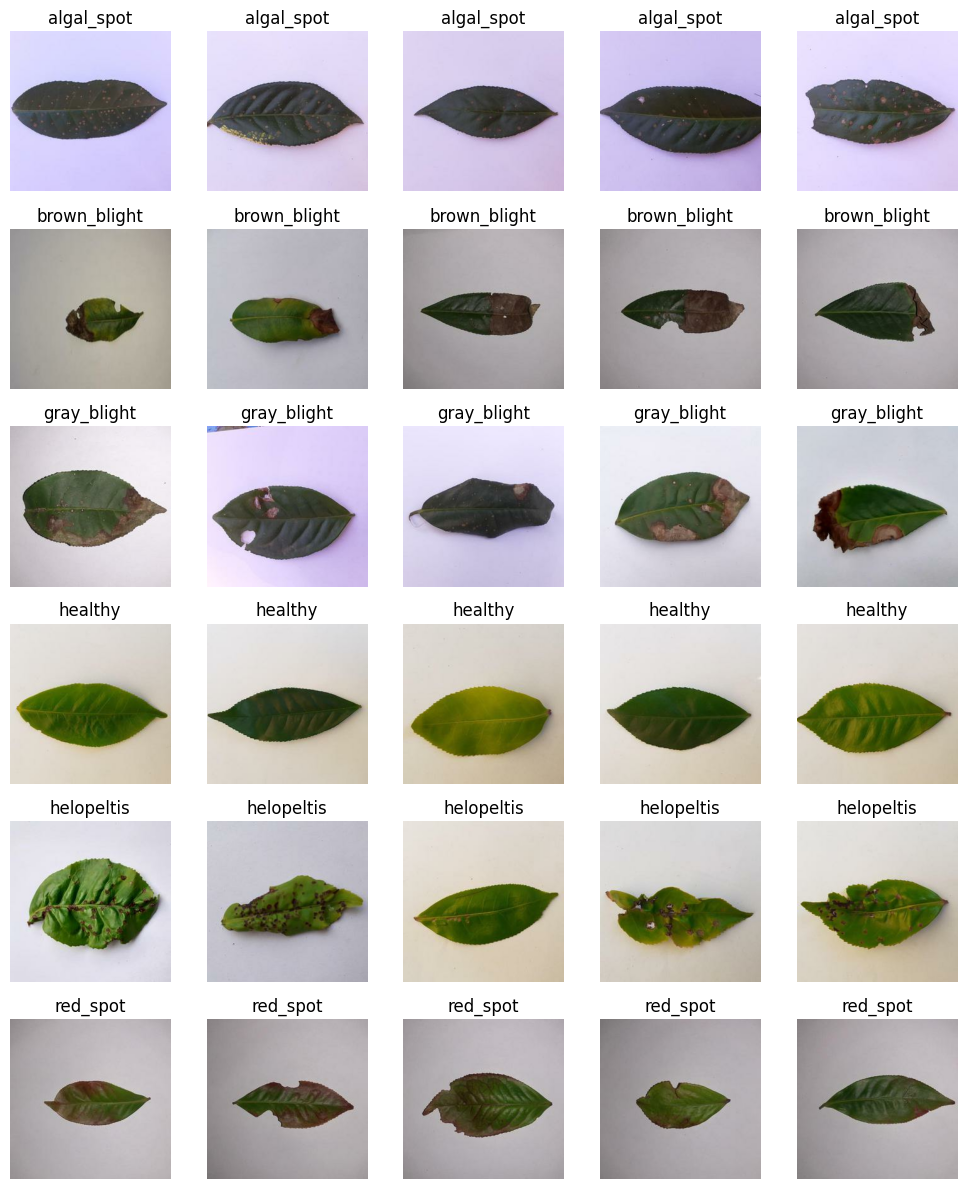

In [ ]:
data_temp = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Tea-Leaf-ResNet50/custom_dataset/train',
    batch_size=5,
    shuffle=False,
    seed=123,
)

class_names = data_temp.class_names

fig, axes = plt.subplots(6, 5, figsize=(10,12))
axes = axes.flatten()

for i, cls in enumerate(class_names):
    j = 0

    for img, label in data_temp:
        if label.numpy()[0] == i:
            ax = axes[i * 5 + j]  # Convert 2D indexing into 1D
            ax.imshow(img[0].numpy().astype("uint8"))
            ax.set_title(cls)
            ax.axis('off')
            j += 1
            if j == 5:  # Kept 5 images per class
                break

plt.tight_layout()
plt.show()

In [ ]:
y_test_true = np.concatenate([y for x, y in test_ds], axis=0)
y_test_true = np.argmax(y_test_true, axis=-1)

In [ ]:
inputs = tf.keras.Input(shape=input_shape)
x = tf.keras.layers.Lambda(preprocess_input)(inputs)

resnet_model = VGG19(weights='imagenet',
                        include_top=False,
                        input_shape=input_shape,
                        input_tensor=x)

for layer in resnet_model.layers:
    layer.trainable = False

x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(6, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=predictions)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

In [ ]:
checkpoint_path = "models/best_vgg19.h5"
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=25, callbacks=[model_checkpoint, early_stopping])

Epoch 1/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5808 - loss: 1.5356
Epoch 1: val_accuracy improved from -inf to 0.86786, saving model to models/best_vgg19.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 439s 3s/step - accuracy: 0.5818 - loss: 1.5308 - val_accuracy: 0.8679 - val_loss: 0.3810
Epoch 2/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8538 - loss: 0.4352
Epoch 2: val_accuracy improved from 0.86786 to 0.90111, saving model to models/best_vgg19.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 40s 276ms/step - accuracy: 0.8538 - loss: 0.4350 - val_accuracy: 0.9011 - val_loss: 0.2878
Epoch 3/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.8988 - loss: 0.2943
Epoch 3: val_accuracy improved from 0.90111 to 0.91049, saving model to models/best_vgg19.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 38s 291ms/step - accuracy: 0.8988 - loss: 0.2943 - val_accuracy: 0.9105 - val_loss: 0.2427
Epoch 4/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.9141 - loss: 0.2366
Epoch 4: val_accuracy improved from 0.91049 to 0.92754, saving model to models/best_vgg19.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 37s 263ms/step - accuracy: 0.9141 - loss: 0.2366 - val_accuracy: 0.9275 - val_loss: 0.2102
Epoch 5/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9308 - loss: 0.1935
Epoch 5: val_accuracy improved from 0.92754 to 0.92839, saving model to models/best_vgg19.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 266ms/step - accuracy: 0.9308 - loss: 0.1935 - val_accuracy: 0.9284 - val_loss: 0.2038
Epoch 6/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9370 - loss: 0.1693
Epoch 6: val_accuracy improved from 0.92839 to 0.93606, saving model to models/best_vgg19.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 265ms/step - accuracy: 0.9370 - loss: 0.1693 - val_accuracy: 0.9361 - val_loss: 0.1922
Epoch 7/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9548 - loss: 0.1379
Epoch 7: val_accuracy improved from 0.93606 to 0.94800, saving model to models/best_vgg19.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 264ms/step - accuracy: 0.9548 - loss: 0.1378 - val_accuracy: 0.9480 - val_loss: 0.1738
Epoch 8/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9589 - loss: 0.1096
Epoch 8: val_accuracy did not improve from 0.94800
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 264ms/step - accuracy: 0.9589 - loss: 0.1096 - val_accuracy: 0.9463 - val_loss: 0.1701
Epoch 9/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9749 - loss: 0.0822
Epoch 9: val_accuracy did not improve from 0.94800
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 263ms/step - accuracy: 0.9748 - loss: 0.0823 - val_accuracy: 0.9361 - val_loss: 0.1893
Epoch 10/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9749 - loss: 0.0817
Epoch 10: val_accuracy improved from 0.94800 to 0.95141, saving model to models/best_vgg19.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 44s 286ms/step - accuracy: 0.9748 - loss: 0.0818 - val_accuracy: 0.9514 - val_loss: 0.1605
Epoch 11/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9647 - loss: 0.0951
Epoch 11: val_accuracy did not improve from 0.95141
129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 262ms/step - accuracy: 0.9647 - loss: 0.0951 - val_accuracy: 0.9488 - val_loss: 0.1508
Epoch 12/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9732 - loss: 0.0890
Epoch 12: val_accuracy did not improve from 0.95141
129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 262ms/step - accuracy: 0.9733 - loss: 0.0890 - val_accuracy: 0.9480 - val_loss: 0.1889
Epoch 13/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9801 - loss: 0.0590
Epoch 13: val_accuracy did not improve from 0.95141
129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 262ms/step - accuracy: 0.9801 - loss: 0.0590 - val_accuracy: 0.9497 - val_loss: 0.1572
Epoch 14/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9773 - loss: 0.0606
Epoch 14

129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 264ms/step - accuracy: 0.9811 - loss: 0.0581 - val_accuracy: 0.9531 - val_loss: 0.1469
Epoch 16/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9813 - loss: 0.0507
Epoch 16: val_accuracy improved from 0.95311 to 0.95823, saving model to models/best_vgg19.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 44s 286ms/step - accuracy: 0.9813 - loss: 0.0508 - val_accuracy: 0.9582 - val_loss: 0.1440
Epoch 17/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9815 - loss: 0.0516
Epoch 17: val_accuracy improved from 0.95823 to 0.96078, saving model to models/best_vgg19.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 38s 264ms/step - accuracy: 0.9815 - loss: 0.0516 - val_accuracy: 0.9608 - val_loss: 0.1562
Epoch 18/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9830 - loss: 0.0529
Epoch 18: val_accuracy did not improve from 0.96078
129/129 ━━━━━━━━━━━━━━━━━━━━ 43s 283ms/step - accuracy: 0.9830 - loss: 0.0528 - val_accuracy: 0.9471 - val_loss: 0.1763
Epoch 19/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9855 - loss: 0.0457
Epoch 19: val_accuracy did not improve from 0.96078
129/129 ━━━━━━━━━━━━━━━━━━━━ 37s 283ms/step - accuracy: 0.9855 - loss: 0.0456 - val_accuracy: 0.9514 - val_loss: 0.1647
Epoch 20/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.9859 - loss: 0.0340
Epoch 20: val_accuracy did not improve from 0.96078
129/129 ━━━━━━━━━━━━━━━━━━━━ 36s 282ms/step - accuracy: 0.9859 - loss: 0.0340 - val_accuracy: 0.9497 - val_loss: 0.1615
Epoch 21/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9779 - loss: 0.0560
Epoch 21

In [ ]:
from tensorflow.keras.applications.vgg19 import preprocess_input

final_model = tf.keras.models.load_model(
    "/content/drive/MyDrive/Tea-Leaf-ResNet50/models/best_vgg19.h5",
    custom_objects={'preprocess_input': preprocess_input},
    compile=False
)

final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import os
os.makedirs("history", exist_ok=True)  # Ensures the 'history' folder exists

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.to_csv("history/history_vgg19.csv", index=False)

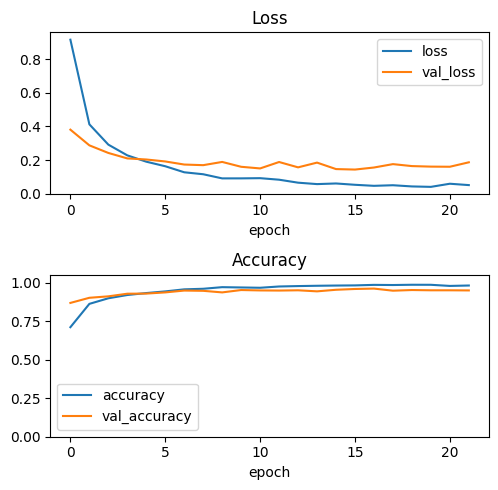

In [ ]:
history_df = pd.read_csv("history/history_vgg19.csv")

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(211)
ax1.set_title('Loss')
ax1.plot(history_df['loss'], label='loss')
ax1.plot(history_df['val_loss'], label='val_loss')
ax1.set_xlabel("epoch")
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.set_title('Accuracy')
ax2.plot(history_df['accuracy'], label='accuracy')
ax2.plot(history_df['val_accuracy'], label='val_accuracy')
ax2.set_xlabel("epoch")
ax2.legend()
ax2.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

In [ ]:
y_test_pred = np.argmax(final_model.predict(test_ds), axis=-1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 513ms/step


In [ ]:
def format_percent(val):
    return "{:.2f}%".format(val * 100)

In [ ]:
report = classification_report(y_test_true, y_test_pred, digits=4, output_dict=True)
class_report = pd.DataFrame(report).transpose()
class_report.iloc[:, :3] = class_report.iloc[:, :3].applymap(lambda x: x * 100)
class_report = class_report.style.format("{:.2f}", subset=pd.IndexSlice[:, ['precision', 'recall', 'f1-score']])\
                              .format("{:.0f}", subset=pd.IndexSlice[:, ['support']])
class_report


<ipython-input-34-1ec1dbb001f0>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  class_report.iloc[:, :3] = class_report.iloc[:, :3].applymap(lambda x: x * 100)


,precision,recall,f1-score,support
0,94.29,99.00,96.59,100
1,90.62,98.86,94.57,88
2,98.82,84.00,90.81,100
3,94.17,97.00,95.57,100
4,93.27,97.00,95.10,100
5,100.00,95.00,97.44,100
accuracy,95.07,95.07,95.07,1
macro avg,95.20,95.14,95.01,588
weighted avg,95.29,95.07,95.02,588


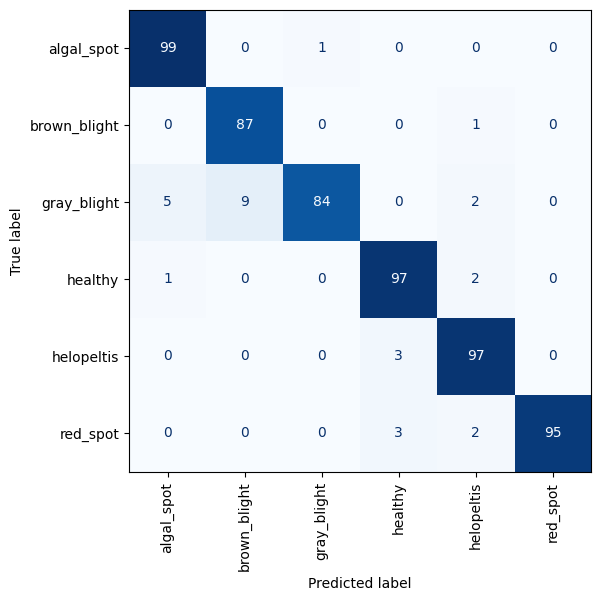

In [ ]:
class_names = test_ds.class_names
conf = confusion_matrix(y_test_true, y_test_pred)
disp = ConfusionMatrixDisplay(conf, display_labels=class_names)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, xticks_rotation=90, cmap="Blues", colorbar=False)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


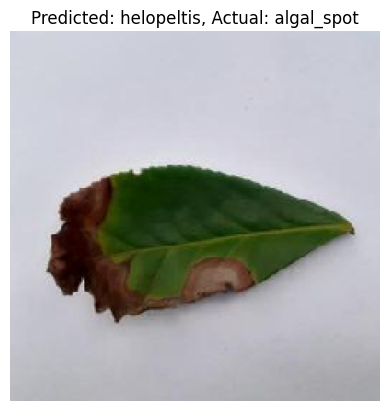

In [ ]:
# Make a Prediction

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Load the final model
final_model = tf.keras.models.load_model(
    "/content/drive/MyDrive/Tea-Leaf-VGG19/models/best_vgg19.h5",
    custom_objects={'preprocess_input': tf.keras.applications.vgg19.preprocess_input},
    compile=False
)

# Prepare the test dataset (needed to get class names)
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Tea-Leaf-VGG19/custom_dataset/test',
    shuffle=False,
    label_mode="categorical",
    seed=123,
    image_size=(224, 224),
    batch_size=1)

# Get class names
class_names = test_ds.class_names

# Function to predict from a folder or single image
def predict_custom_path(path):
    # Convert to Path object for easier handling
    path = Path(path)
    images_to_predict = []

    # Check if it's a directory or single file
    if path.is_dir():
        # Process all images in directory
        for img_path in path.glob('*'):  # Get all files in directory
            if img_path.suffix.lower() in ['.jpg', '.jpeg', '.png']:
                img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
                img_array = tf.keras.utils.img_to_array(img)
                images_to_predict.append((img_array, str(img_path.name)))
    elif path.is_file():
        # Process single image
        img = tf.keras.utils.load_img(path, target_size=(224, 224))
        img_array = tf.keras.utils.img_to_array(img)
        images_to_predict.append((img_array, str(path.name)))
    else:
        raise ValueError("Invalid path provided")

    # If no images found, raise an error
    if not images_to_predict:
        raise ValueError("No valid images found in the provided path")

    # Create plot for custom predictions
    plt.figure(figsize=(15, 5))
    for i, (img, img_name) in enumerate(images_to_predict, 1):
        # Prepare image for prediction
        img_expanded = np.expand_dims(img, axis=0)

        # Make prediction
        prediction = final_model.predict(img_expanded)
        predicted_class = class_names[np.argmax(prediction)]

        # Create subplot
        plt.subplot(1, len(images_to_predict), i)
        plt.imshow(img.astype('uint8'))
        plt.title(f"File: {img_name}\nPred: {predicted_class}", fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Print predictions
    for img, img_name in images_to_predict:
        prediction = final_model.predict(np.expand_dims(img, axis=0))
        predicted_class = class_names[np.argmax(prediction)]
        print(f"Image: {img_name} - Predicted class: {predicted_class}")

# Example usage of the prediction function
# Replace with your folder path or image path
custom_path = "/content/drive/MyDrive/Tea-Leaf-VGG19/Test-Image"  # Update this path
try:
    predict_custom_path(custom_path)
except ValueError as e:
    print(f"Error: {e}")